**Authors**: Ariadna Recasens

## 1. OVERVIEW

## 2. BUSINESS PROBLEM

## 3. DATA UNDERSTANDING
This project explores an [Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) containing 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 

The device was located on the field in a significantly polluted area, at road level,within an Italian city. 

Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. 

Missing values are tagged with -200 value.

**Attribute Information**:
* 0 Date (DD/MM/YYYY)
* 1 Time (HH.MM.SS)
* 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* 7 True hourly averaged NOx concentration in ppb (reference analyzer)
* 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* 12 Temperature in Â°C
* 13 Relative Humidity (%)
* 14 AH Absolute Humidity



### Importing necessary libraries

In [1]:
#data cleaning and stats
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#normality check
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf


#linear regression (sklearn and statsmodels)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score



#### Let's open the data file

In [2]:

data = pd.read_csv('./data/AirQualityUCI.csv', delimiter=';')


## Data Understanding

Let's start exploring our data

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


We are going to rename the columns to make it easier to manipulate the data

In [4]:
data.columns=data.columns.str.replace('[(,),.]','')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   COGT         9357 non-null   object 
 3   PT08S1CO     9357 non-null   float64
 4   NMHCGT       9357 non-null   float64
 5   C6H6GT       9357 non-null   object 
 6   PT08S2NMHC   9357 non-null   float64
 7   NOxGT        9357 non-null   float64
 8   PT08S3NOx    9357 non-null   float64
 9   NO2GT        9357 non-null   float64
 10  PT08S4NO2    9357 non-null   float64
 11  PT08S5O3     9357 non-null   float64
 12  T            9357 non-null   object 
 13  RH           9357 non-null   object 
 14  AH           9357 non-null   object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Let's eliminate the columns that are not essential for our analysis.


In [6]:
data = data.drop(['Unnamed: 15'], axis=1)
data = data.drop(['Unnamed: 16'], axis=1)
data = data.drop(['Time'], axis=1)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9357 non-null   object 
 1   COGT        9357 non-null   object 
 2   PT08S1CO    9357 non-null   float64
 3   NMHCGT      9357 non-null   float64
 4   C6H6GT      9357 non-null   object 
 5   PT08S2NMHC  9357 non-null   float64
 6   NOxGT       9357 non-null   float64
 7   PT08S3NOx   9357 non-null   float64
 8   NO2GT       9357 non-null   float64
 9   PT08S4NO2   9357 non-null   float64
 10  PT08S5O3    9357 non-null   float64
 11  T           9357 non-null   object 
 12  RH          9357 non-null   object 
 13  AH          9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


Now let's explore NaN values

In [7]:
#inspect for any columns with null values
data.isna().sum()

Date          114
COGT          114
PT08S1CO      114
NMHCGT        114
C6H6GT        114
PT08S2NMHC    114
NOxGT         114
PT08S3NOx     114
NO2GT         114
PT08S4NO2     114
PT08S5O3      114
T             114
RH            114
AH            114
dtype: int64

Let's deal with NaN data. From the data above, we know that there are 114 rows with NaN values. Since this correspond to a small percentage, we proceed to delete the rows that contain Nan values.

In [8]:
data = data.dropna()

As mentioned in the Dataset information, the missing values are tagged with -200 values. Let's explore that a bit further:

In [9]:
data['COGT'].value_counts()

-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
        ... 
9,9        1
7          1
7,6        1
11,9       1
9,2        1
Name: COGT, Length: 104, dtype: int64

In [10]:
data['T'].value_counts()

-200    366
20,8     57
21,3     54
20,2     51
13,8     51
       ... 
40,7      1
42,6      1
36,7      1
0,5       1
40,9      1
Name: T, Length: 437, dtype: int64

In [11]:
#data['CO(GT)'].tail()
data.sort_values('COGT').head()


,Date,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
3501,03/08/2004,-200,1076.0,-200.0,"9,3",951.0,112.0,730.0,109.0,1675.0,704.0,"36,5","28,7","1,7256"
3301,26/07/2004,-200,1150.0,-200.0,"11,2",1020.0,180.0,686.0,116.0,1842.0,1169.0,"26,5","46,3","1,5768"
3302,26/07/2004,-200,1088.0,-200.0,"9,7",965.0,168.0,734.0,109.0,1744.0,1049.0,"27,9","42,7","1,5754"
3303,26/07/2004,-200,993.0,-200.0,"7,2",866.0,111.0,832.0,98.0,1637.0,823.0,"28,8","38,9","1,5184"
3304,26/07/2004,-200,962.0,-200.0,"6,8",849.0,111.0,861.0,97.0,1559.0,804.0,"31,7","31,5","1,4487"


To deal with these missing. values, we will replace them for the median of the columns.

In [12]:
for i in data.columns:
    if i == 'Date':
        continue
    else :
        data[i] = data[i].astype(str)
        data[i] = data[i].str.replace(",",".")
        data[i] = data[i].astype(str).astype(float)
        data[i] = data[i].replace(-200,data['COGT'].median())

Let's confirm that it has worked: 


In [13]:
data['T'].value_counts()

 1.5     368
 20.8     57
 21.3     54
 20.2     51
 13.8     51
        ... 
 0.5       1
 39.4      1
 40.7      1
 42.5      1
-1.4       1
Name: T, Length: 436, dtype: int64

In [14]:
data['COGT'].value_counts()

1.5     1956
1.0      305
1.4      279
1.6      275
1.1      262
        ... 
7.6        1
9.3        1
9.5        1
10.1       1
11.9       1
Name: COGT, Length: 96, dtype: int64

In [15]:
data['NMHCGT'].value_counts()

1.5      8443
66.0       14
40.0        9
29.0        9
88.0        8
         ... 
252.0       1
511.0       1
102.0       1
131.0       1
541.0       1
Name: NMHCGT, Length: 430, dtype: int64

Let's further explore the data with some plots. Let's see how the CO2 and T change over time:

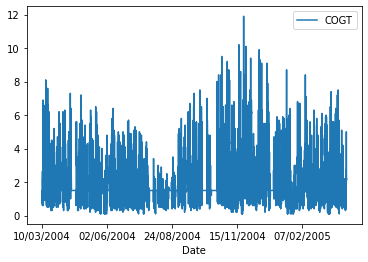

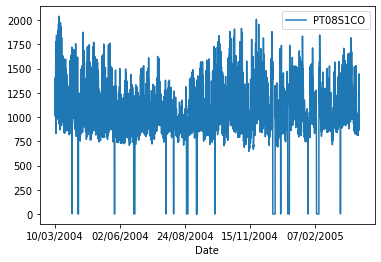

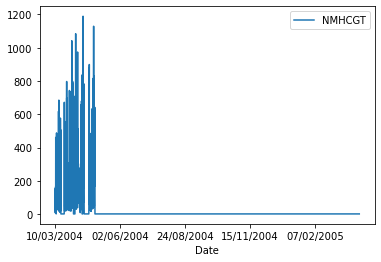

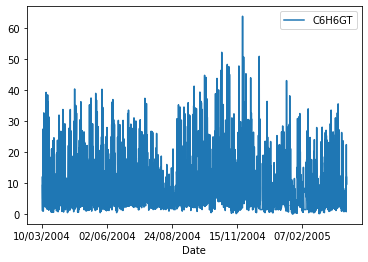

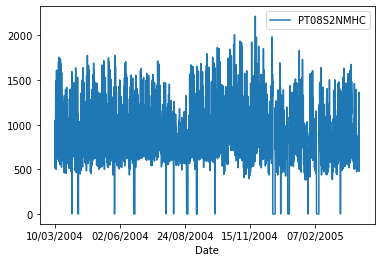

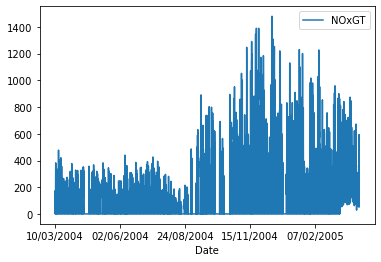

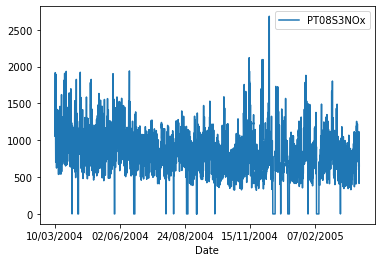

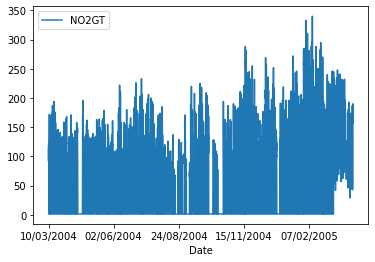

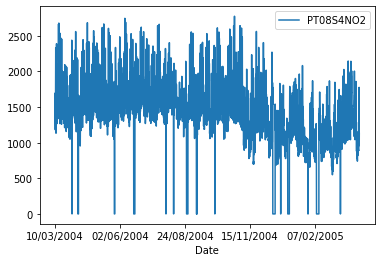

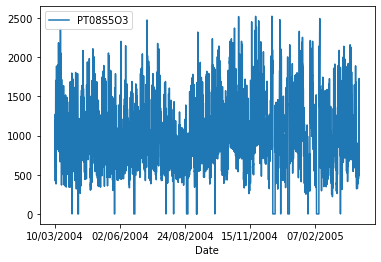

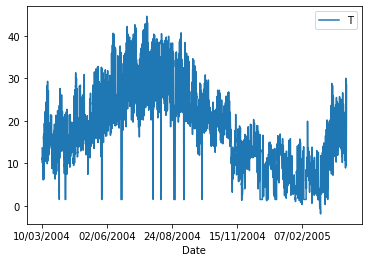

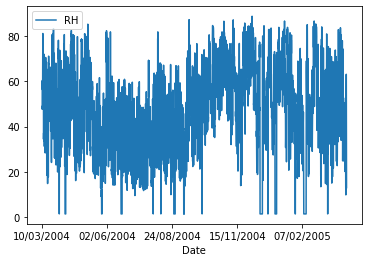

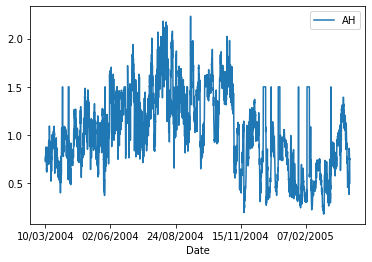

In [16]:


for i in data.columns:
    if i == 'Date':
        continue
    else :
        data.plot(x="Date", y=i)
        #plt.savefig('./images/hello.png', bbox_inches = "tight")
        plt.savefig('./images/'+str(i)+"test.png",dpi=300)
        plt.show



Let's further explore how the variables change with time

In [17]:

data.groupby(pd.PeriodIndex(data['Date'], freq="M"))['T'].mean()


Date
2004-01    21.750463
2004-02    23.225926
2004-03    17.661756
2004-04    19.131790
2004-05    21.646280
2004-06    23.858179
2004-07    27.158631
2004-08    23.947470
2004-09    21.507870
2004-10    19.988938
2004-11    14.775000
2004-12    11.726437
2005-01     6.834239
2005-02     7.366250
2005-03    15.118297
2005-04     7.380460
2005-05     8.229167
2005-06     9.166667
2005-07     7.565278
2005-08     8.184722
2005-09     8.427778
2005-10     8.695833
2005-11     8.583333
2005-12    11.122222
Freq: M, Name: T, dtype: float64

In [18]:
data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()


Date
2004    20.240605
2005     9.494393
Freq: A-DEC, Name: T, dtype: float64

To furhter explore the data, let's see how the mean of each of the variables change after 1 year. Are they increaseing?

In [19]:
a = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['COGT'].mean()
b = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S1CO'].mean()
c = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NMHCGT'].mean()
d = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['C6H6GT'].mean()
e = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S2NMHC'].mean()
f = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NOxGT'].mean()
g = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S3NOx'].mean()
h = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NO2GT'].mean()
i = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S4NO2'].mean()
j = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S5O3'].mean()
k = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()
l = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['RH'].mean()
m = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['AH'].mean()


In [20]:
columns = ['variable','average_2014','average_2015']

variables = pd.DataFrame(columns=columns)
def add_values(num_role, variable, dataset):
    variables.loc[num_role] = [variable, dataset[0], dataset[1]]

add_values(1, 'COGT', a)
add_values(2, 'PT08S1CO', b)
add_values(3, 'NMHCGT', c)
add_values(4, 'C6H6GT', d)
add_values(5, 'PT08S2NMHC', e)
add_values(6, 'NOxGT', f)
add_values(7, 'PT08S3NOx', g)
add_values(8, 'NO2GT', h)
add_values(9, 'PT08S4NO2', i)
add_values(10, 'PT08S5O3', j)
add_values(11, 'T', k)
add_values(12, 'RH', l)
add_values(13, 'AH', m)

variables

,variable,average_2014,average_2015
1,COGT,2.036723,2.030975
2,PT08S1CO,1061.597046,1041.919893
3,NMHCGT,29.435724,1.500000
4,C6H6GT,10.338383,7.877303
5,PT08S2NMHC,930.068214,815.172230
6,NOxGT,170.898312,308.375834
7,PT08S3NOx,828.916174,720.461949
8,NO2GT,79.611744,137.482198
9,PT08S4NO2,1502.120956,1074.207388
10,PT08S5O3,980.447117,990.885180


In [21]:
#Now we can eliminate the DAte variable, as it is not of our interst in the following analysis"

data = data.drop('Date', axis=1)


Let's take a look of distributions of selected predictors after preliminary data preparation. 


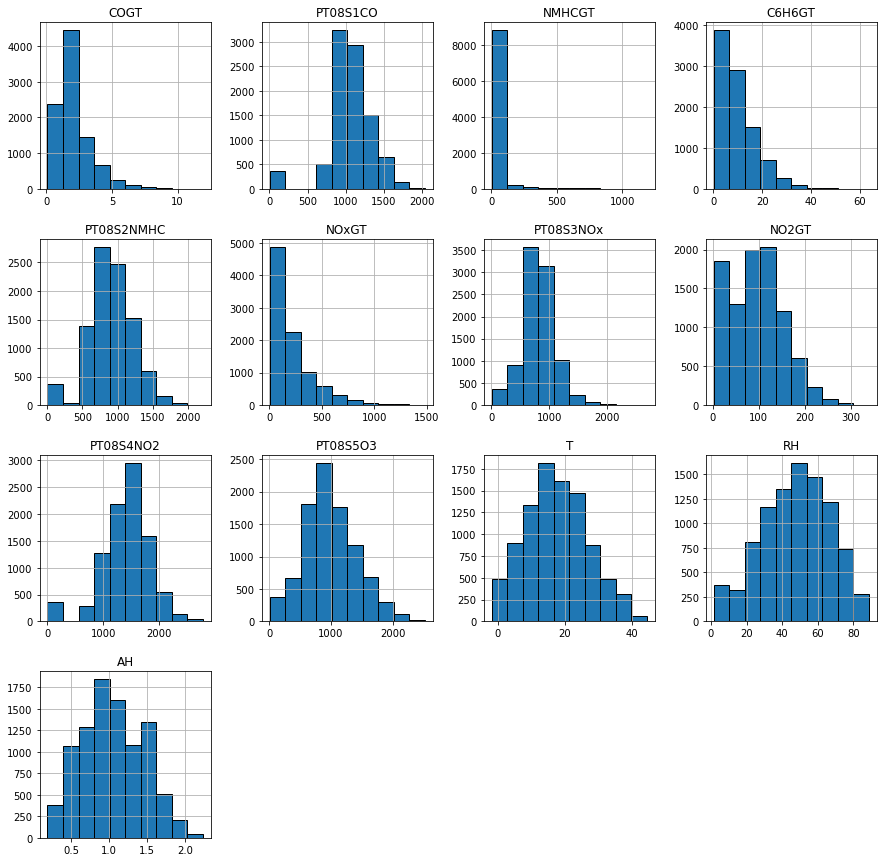

In [22]:
data.hist(figsize=(15,15), edgecolor = 'black');


From the graphs above, we can see that most of the variables display a normal distribution. But let's play a bit, and see if we can improve them with a logarithmic and normalization transformation.
Since we can't do the logarithm of negative values, let's first see which variables have negative values:


In [23]:
for i in data.columns:
    if i == 'Date':
        continue
    if data[i].min() <= 0:
        print(i) 
        
#data['T'].min() --> so we can't take 

T


Based on the above result, we will transform all variables but T

In [24]:
# log features
continuous = ['COGT','PT08S1CO','C6H6GT','PT08S2NMHC','NOxGT','PT08S3NOx','NO2GT','PT08S4NO2','PT08S5O3', 'RH','AH']

# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)


data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COGT_log        9357 non-null   float64
 1   PT08S1CO_log    9357 non-null   float64
 2   C6H6GT_log      9357 non-null   float64
 3   PT08S2NMHC_log  9357 non-null   float64
 4   NOxGT_log       9357 non-null   float64
 5   PT08S3NOx_log   9357 non-null   float64
 6   NO2GT_log       9357 non-null   float64
 7   PT08S4NO2_log   9357 non-null   float64
 8   PT08S5O3_log    9357 non-null   float64
 9   RH_log          9357 non-null   float64
 10  AH_log          9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


Let's see if the distribution improves after the transmoration (log + norm). From the graphs below, we obseve that doing this transfmoration signicantly worsen the normal distribtuion. AS such, we won't apply logarithm transformation to our dataset.

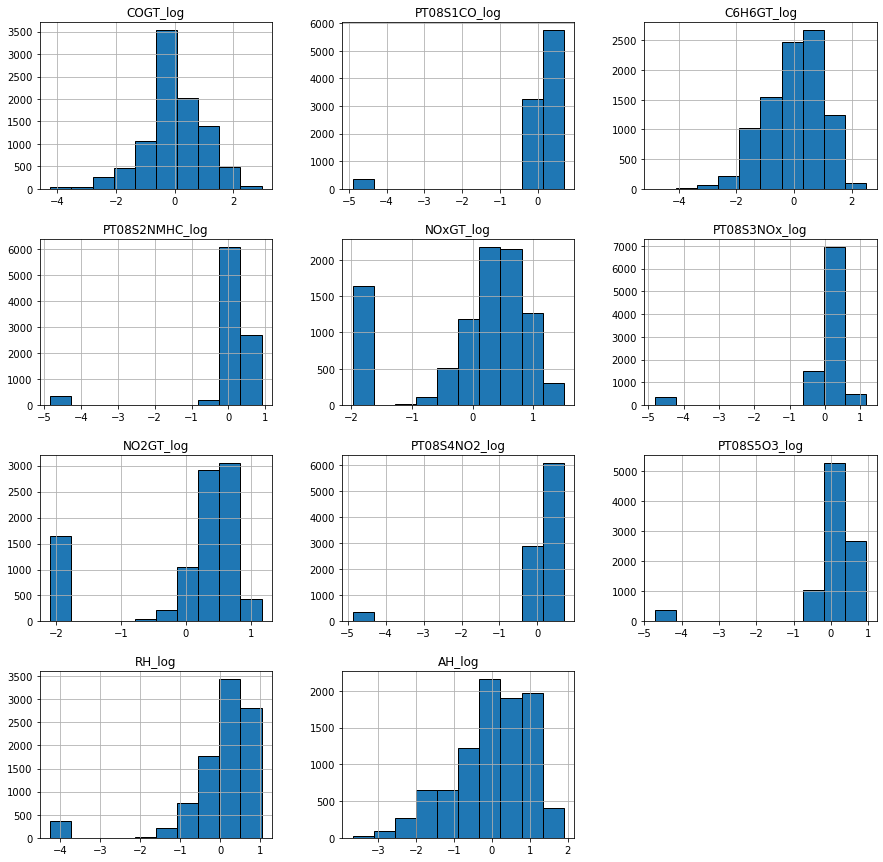

In [25]:
data_log_norm.hist(figsize=(15,15), edgecolor = 'black');


But let's see what happens if we normalize the data, without the logaritmic transformation. We can see from the graphs below that the distribution remains pretty normal, so we will use both the raw data and normalized data for furhter analysis and compare which one works better  

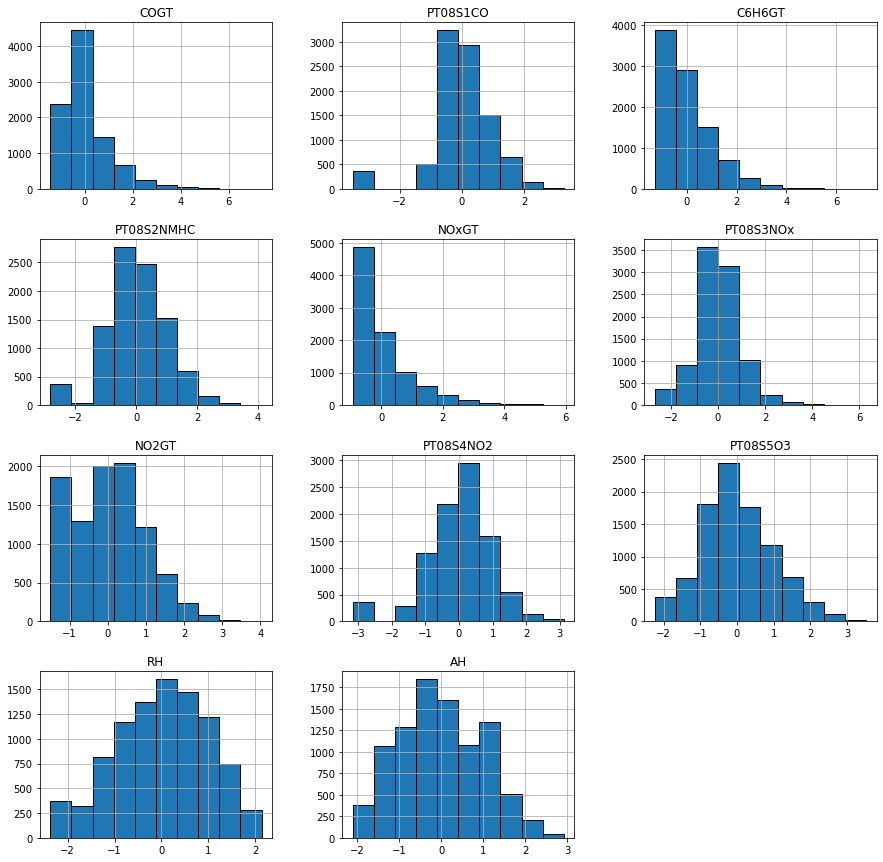

In [26]:
data_norm = data_cont.apply(normalize)
data_norm.hist(figsize=(15,15), edgecolor = 'black');



In [27]:
data2 = pd.concat([data['T'], data_norm], axis=1)

## Correlation visualization

Let's have a quick look to how variables correlate among each others. From the heatmap below, we can see that 5 variables are positively correlated with Temperature, and 7 negatively correlated with T.

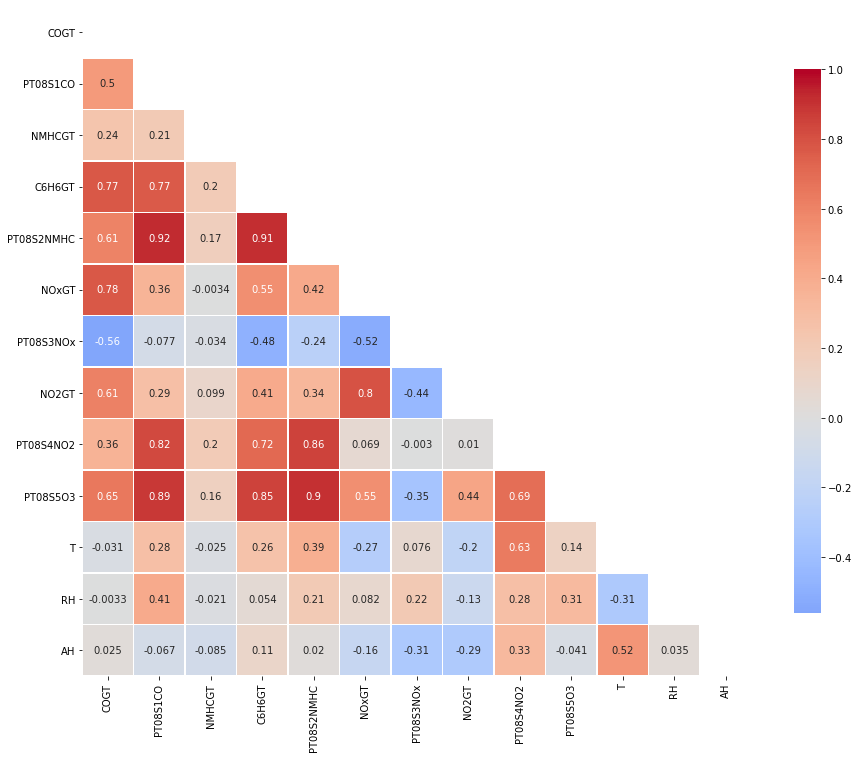

In [28]:
#visualize correlation using heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

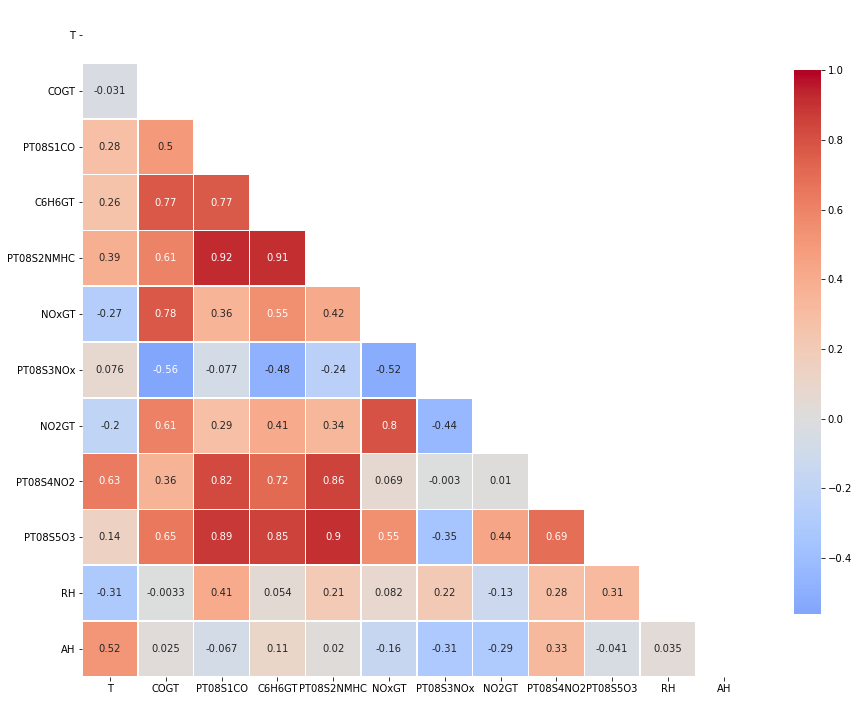

In [29]:
#visualize correlation using heatmap
corr = data2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

Let's do a first model using the raw data, and the normalized data.

#### Model with normalized data
From the table below, we can see that the model is already pretty good. The R-squared value is 0.927, which means that 92.7% of the variablity in T can be explained by this model. 
5 variables significantly (p <0.05) and negatively (coef < 0) contribute to T, while 6 signifcnatly (p<0.05) and positviely (coef >0) contribute to Temperature. 


In [30]:

X = data2.drop('T', axis=1)
y = data2['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:09:28   Log-Likelihood:                -21845.
No. Observations:                9357   AIC:                         4.371e+04
Df Residuals:                    9345   BIC:                         4.380e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6600      0.026    683.327      0.000      17.609      17.711
COGT          -0.7155      0.059    -12.142      0.000      -0.831      -0.600
PT08S1CO       1.3470      0.100     13.426      0.000       1.150       1.544
C6H6GT        -8.0805      0.109    -73.954      0.000      -8.295      -7.866
PT08S2NMHC    10.9595      0.166     66.117      0.000      10.635      11.284
NOxGT          0.8458      0.069     12.331      0.000       0.711       0.980
PT08S3NOx      2.0100      0.055     36.599      0.000       1.902       2.118
NO2GT         -0.4064      0.051     -7.941      0.000      -0.507      -0.306
PT08S4NO2      2.2421      0.120     18.682      0.000       2.007       2.477
PT08S5O3      -1.4308      0.083    -17.230      0.000      -1.594      -1.268
RH            -6.1810      0.038   -162.788      0.000      -6.255      -6.107
AH             5.6325      0.057     98.749      0.000       5.521       5.744
==============================================================================
Omnibus:                     1172.230   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2420.696
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model with raw data
From the table below, we can see that the model is very similar to the one using normalizing data. In fact, The R-squared value is a bit higher 0.929, which means that 92.9% of the variablity in T can be explained by this model. 
But unlike the previos model, this one has the condition number larger (2.83e+04), which might indicate that there are
strong multicollinearity or other numerical problems.
For this reason, we will proceed using the normalized data (or data2)

In [33]:

X1 = data.drop('T', axis=1)
y1 = data['T']

import statsmodels.api as sm
X1_int = sm.add_constant(X1)
model = sm.OLS(y,X1_int).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:10:07   Log-Likelihood:                -21711.
No. Observations:                9357   AIC:                         4.345e+04
Df Residuals:                    9344   BIC:                         4.354e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8898      0.268    -55.631      0.000     -15.414     -14.365
COGT          -0.3388      0.045     -7.536      0.000      -0.427      -0.251
PT08S1CO       0.0055      0.000     16.476      0.000       0.005       0.006
NMHCGT        -0.0055      0.000    -16.458      0.000      -0.006      -0.005
C6H6GT        -1.0416      0.015    -71.544      0.000      -1.070      -1.013
PT08S2NMHC     0.0318      0.001     59.387      0.000       0.031       0.033
NOxGT          0.0026      0.000      7.960      0.000       0.002       0.003
PT08S3NOx      0.0064      0.000     35.276      0.000       0.006       0.007
NO2GT         -0.0049      0.001     -5.895      0.000      -0.007      -0.003
PT08S4NO2      0.0059      0.000     21.670      0.000       0.005       0.006
PT08S5O3      -0.0034      0.000    -18.063      0.000      -0.004      -0.003
RH            -0.3201      0.002   -165.311      0.000      -0.324      -0.316
AH            13.3538      0.142     94.208      0.000      13.076      13.632
==============================================================================
Omnibus:                     1162.446   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2434.498
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

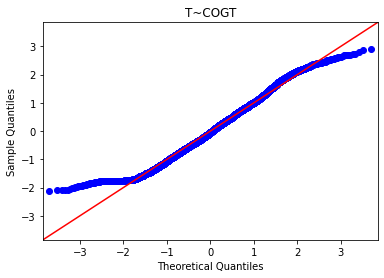

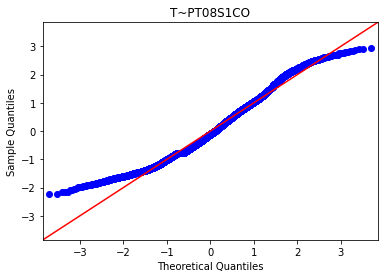

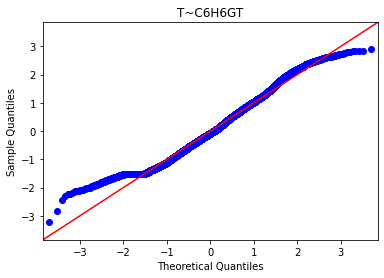

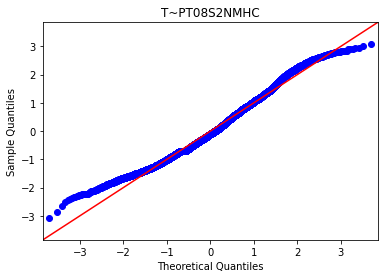

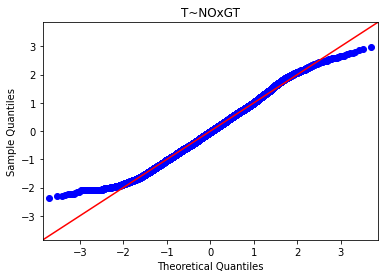

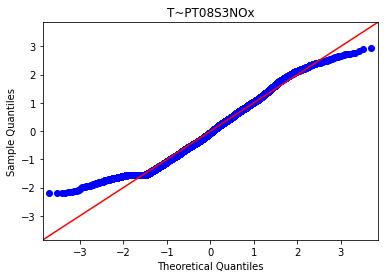

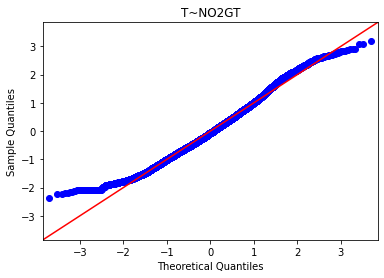

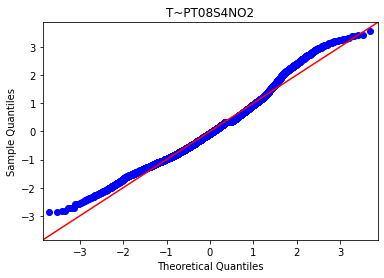

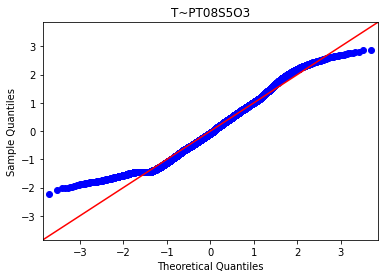

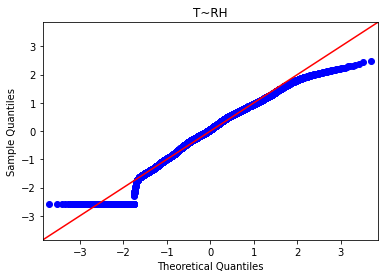

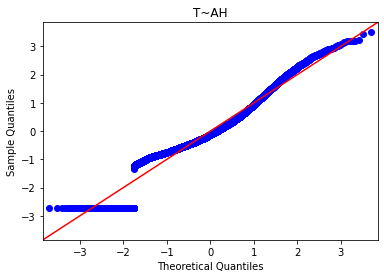

In [32]:
#Here we use QQ-plots to furhter confirm that our data follows a normal distribution. 

f_names = ['T~COGT', 'T~PT08S1CO', 'T~C6H6GT', 'T~PT08S2NMHC', 'T~NOxGT','T~PT08S3NOx','T~NO2GT','T~PT08S4NO2','T~PT08S5O3','T~RH','T~AH']

import warnings
warnings.filterwarnings('ignore')

for i in f_names:
    model = smf.ols(formula=i, data=data2).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(i)
    fig.show();

To see if we can improve our model, we next explore multicolinearity in our model. 

In [34]:
data2.corr()
abs(data2.corr()) > 0.8

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,
"(PT08S1CO, PT08S2NMHC)",0.922007
"(C6H6GT, PT08S2NMHC)",0.912973
"(PT08S5O3, PT08S2NMHC)",0.903005
"(PT08S5O3, PT08S1CO)",0.886844
"(PT08S4NO2, PT08S2NMHC)",0.855634
"(PT08S5O3, C6H6GT)",0.853297
"(PT08S1CO, PT08S4NO2)",0.823349


We explore the effect of deleting the variables that display a higher multicolinearity:

In [35]:
data3 = data2.drop(['PT08S2NMHC'], axis=1)
data3 = data2.drop(['PT08S5O3'], axis=1)
data3 = data2.drop(['PT08S1CO'], axis=1)

In [38]:
#data = data.drop('Date', axis=1)

X2 = data3.drop('T', axis=1)
y2 = data3['T']

import statsmodels.api as sm
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:11:17   Log-Likelihood:                -21934.
No. Observations:                9357   AIC:                         4.389e+04
Df Residuals:                    9346   BIC:                         4.397e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6600      0.026    676.867      0.000      17.609      17.711
COGT          -0.6578      0.059    -11.087      0.000      -0.774      -0.542
C6H6GT        -8.4324      0.107    -78.746      0.000      -8.642      -8.223
PT08S2NMHC    11.7862      0.155     75.859      0.000      11.482      12.091
NOxGT          0.8182      0.069     11.821      0.000       0.683       0.954
PT08S3NOx      2.0231      0.055     36.495      0.000       1.914       2.132
NO2GT         -0.3690      0.052     -7.154      0.000      -0.470      -0.268
PT08S4NO2      2.6002      0.118     22.012      0.000       2.369       2.832
PT08S5O3      -1.0286      0.078    -13.155      0.000      -1.182      -0.875
RH            -6.0003      0.036   -167.409      0.000      -6.071      -5.930
AH             5.4662      0.056     97.247      0.000       5.356       5.576
==============================================================================
Omnibus:                     1162.400   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2280.352
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                       4.830   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that after deleting the variables with higher correlation we don't improve the model. In fact, we reduce R2 slightly. As such, we proceed with deleting any variables, so we can draw conclusions for more variables.

### Model Validation

Now let's validate our test using test and train substets:

In [39]:
from sklearn.model_selection import train_test_split

X = data2.drop('T', axis=1)
y = data2['T']

# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [42]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

6.717933911061038

In [44]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_20_results = cross_val_score(linreg, X, y, cv=20, scoring=mse)

cv_5_results.mean(), cv_10_results.mean(), cv_20_results.mean()

(10.88967508515735, 8.267462995373915, 7.394015613673917)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 6.221160471246746
Test Mean Squarred Error: 6.33602034041147


From the data above, we can see that the model works pretty similar using Train and test data, which validates our model. 

### Interactions
Now let's try to improve our model studying interaction between variables:


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.9266069768730973

In [48]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
Top interactions: [('PT08S4NO2', 'RH', 0.948), ('PT08S1CO', 'PT08S4NO2', 0.94), ('PT08S2NMHC', 'RH', 0.939)]


Let's re-do our model introducing these interactions:

In [50]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['PT08S4NO2_RH'] = X['PT08S4NO2'] * X['RH']
X_interact['PT08S1CO_PT08S4NO2'] = X['PT08S1CO'] * X['PT08S4NO2']
X_interact['PT08S2NMHC_RH'] = X['PT08S2NMHC'] * X['RH']

interact = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact

0.9503399887405433

If we run a new model using this interaction-dataset, we see that we improve the R-squared a little bit, being now 0.951. 

In [51]:

import statsmodels.api as sm
X_int2 = sm.add_constant(X_interact)
model = sm.OLS(y,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:17:07   Log-Likelihood:                -20015.
No. Observations:                9357   AIC:                         4.006e+04
Df Residuals:                    9342   BIC:                         4.017e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.0928      0.045    420.133      0.000      19.004      19.182
COGT                  -0.2758      0.050     -5.530      0.000      -0.374      -0.178
PT08S1CO               1.4163      0.085     16.758      0.000       1.251       1.582
C6H6GT                -0.7549      0.219     -3.443      0.001      -1.185      -0.325
PT08S2NMHC             2.1064      0.273      7.714      0.000       1.571       2.642
NOxGT                  0.8911      0.063     14.108      0.000       0.767       1.015
PT08S3NOx              0.6531      0.051     12.765      0.000       0.553       0.753
NO2GT                 -0.6562      0.045    -14.741      0.000      -0.743      -0.569
PT08S4NO2              2.0819      0.099     20.996      0.000       1.888       2.276
PT08S5O3              -1.9603      0.069    -28.282      0.000      -2.096      -1.824
RH                    -6.4299      0.032   -203.285      0.000      -6.492      -6.368
AH                     5.6726      0.047    120.574      0.000       5.580       5.765
PT08S4NO2_RH          -1.9279      0.055    -35.162      0.000      -2.035      -1.820
PT08S1CO_PT08S4NO2    -1.1668      0.054    -21.601      0.000      -1.273      -1.061
PT08S2NMHC_RH          0.3640      0.052      7.007      0.000       0.262       0.466
==============================================================================
Omnibus:                     2305.734   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9374.624
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       7.313   Cond. No.                         55.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Further validation of the new interact model

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 4.23125594596542
Test Mean Squarred Error: 4.194329212151758


From the data above, we can conclude that our model works pretty well in both train and test substets.

Now let's see what are the variables that positively contribute to T, and which ones negatively contribute to T in our model: 

In [63]:
columns = ['index','coef']

coef_positive_table = pd.DataFrame(columns=columns)
coef_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model.params[:-3]):
    if a > 0:
        coef_positive_table.loc[i] = [i,a]
    else:
        coef_negative_table.loc[i] = [i,a]

coef_positive_table     

,index,coef
0,0.0,19.092793
2,2.0,1.416306
4,4.0,2.106448
5,5.0,0.891067
6,6.0,0.653086
8,8.0,2.081912
11,11.0,5.672588


In [64]:
coef_positive_table = coef_positive_table.iloc[1: , :]
coef_positive_table

,index,coef
2,2.0,1.416306
4,4.0,2.106448
5,5.0,0.891067
6,6.0,0.653086
8,8.0,2.081912
11,11.0,5.672588


In [65]:
index_positive = coef_positive_table.index


#grade_analysis #data2?

grade_of_interstet = []

for i in index_positive:
    grade_of_interstet.append(data2.columns[i])

grade_of_interstet

['PT08S1CO', 'PT08S2NMHC', 'NOxGT', 'PT08S3NOx', 'PT08S4NO2', 'AH']

In [66]:
index_negative = coef_negative_table.index


#grade_analysis #data2?
negative_variables = []

for i in index_negative:
    negative_variables.append(data2.columns[i])

negative_variables

['COGT', 'C6H6GT', 'NO2GT', 'PT08S5O3', 'RH']

## CONC